In [3]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
import cv2
plt.rcParams["figure.figsize"] = (15, 8)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

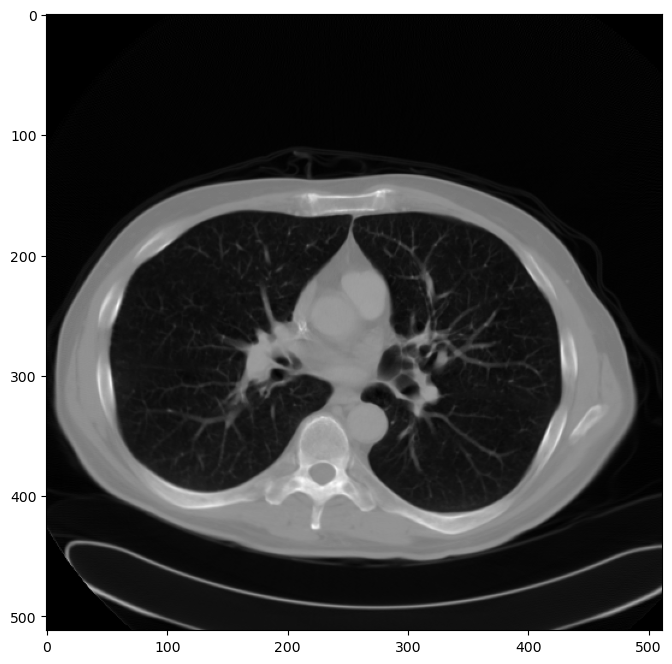

In [4]:
# Working with dicom image sample
ds = dcmread("ID_0000_AGE_0060_CONTRAST_1_CT.dcm")
print(ds)
arr = ds.pixel_array
print(arr.shape)
I=arr
plt.imshow(I,cmap='gray')
plt.show()

In [5]:
def show_fourier(I):
    img = I
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-6)

    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title("Input Image"), plt.xticks([]), plt.yticks([])

    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
    plt.show()


def high_pass_filter(img, x_lim, y_lim):
    rows, cols = img.shape
    crow, ccol = rows / 2, cols / 2
    crow = int(crow)
    ccol = int(ccol)

    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    fshift[(crow - x_lim):(crow + x_lim + 1), (ccol - y_lim):(ccol + y_lim + 1)] = (1e-10) * fshift[(crow - x_lim):(
            crow + x_lim + 1), (ccol - y_lim):(ccol + y_lim + 1)]

    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return (img_back)


def low_pass_filter(img, x_lim, y_lim):
    return (img - high_pass_filter(img, x_lim, y_lim))


def bound_pass_filter(img, x_center, y_center, x_width, y_width):
    I1 = low_pass_filter(img, x_center - x_width, y_center - y_width)
    I2 = low_pass_filter(img, x_center + x_width, y_center + y_width)

    return (I2 - I1)


In [6]:
I = cv2.imread('Fig0107(a)(chest-xray-vandy).tif')
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
I = cv2.resize(I, (128, 128))
print(I.shape)

(128, 128)


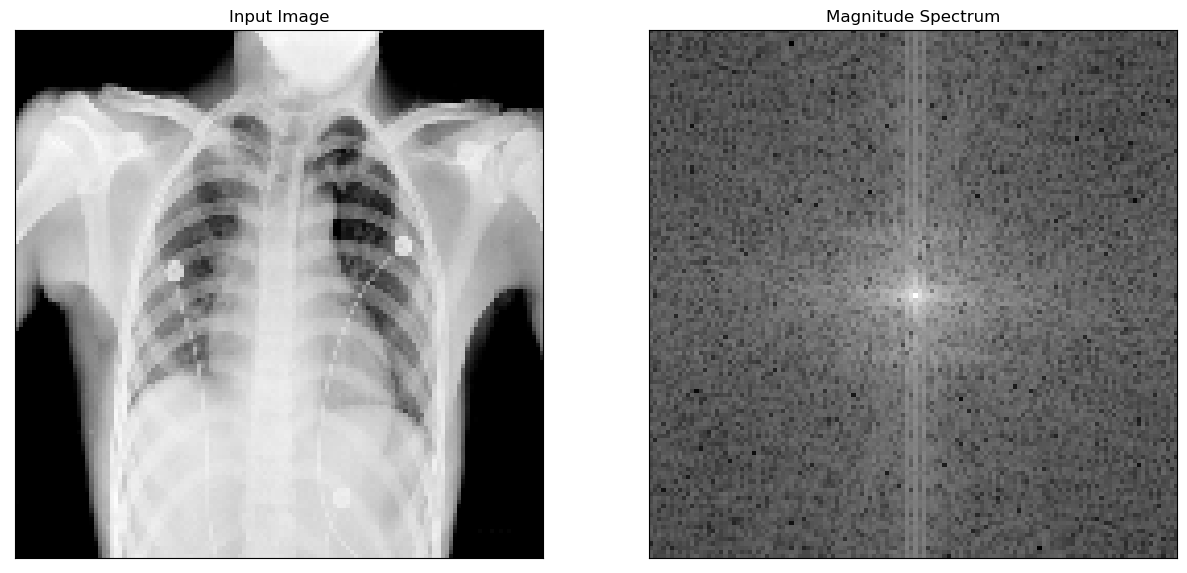

In [7]:
show_fourier(I)

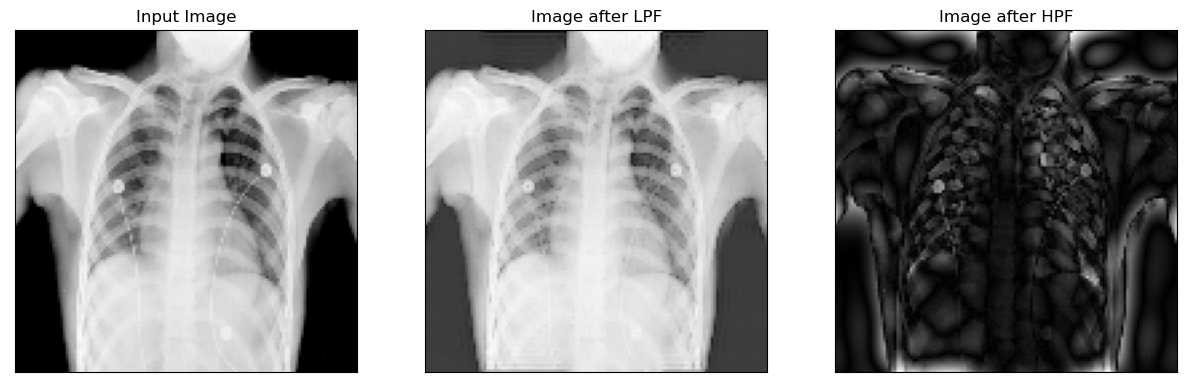

In [8]:
# Filtering in Frequency Domain

img_hp = high_pass_filter(img=I, x_lim=5, y_lim=5)
img_lp = low_pass_filter(img=I, x_lim=25, y_lim=25)

plt.subplot(131), plt.imshow(I, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_lp, cmap='gray')
plt.title("Image after LPF"), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_hp, cmap='gray')
plt.title("Image after HPF"), plt.xticks([]), plt.yticks([])

plt.show()

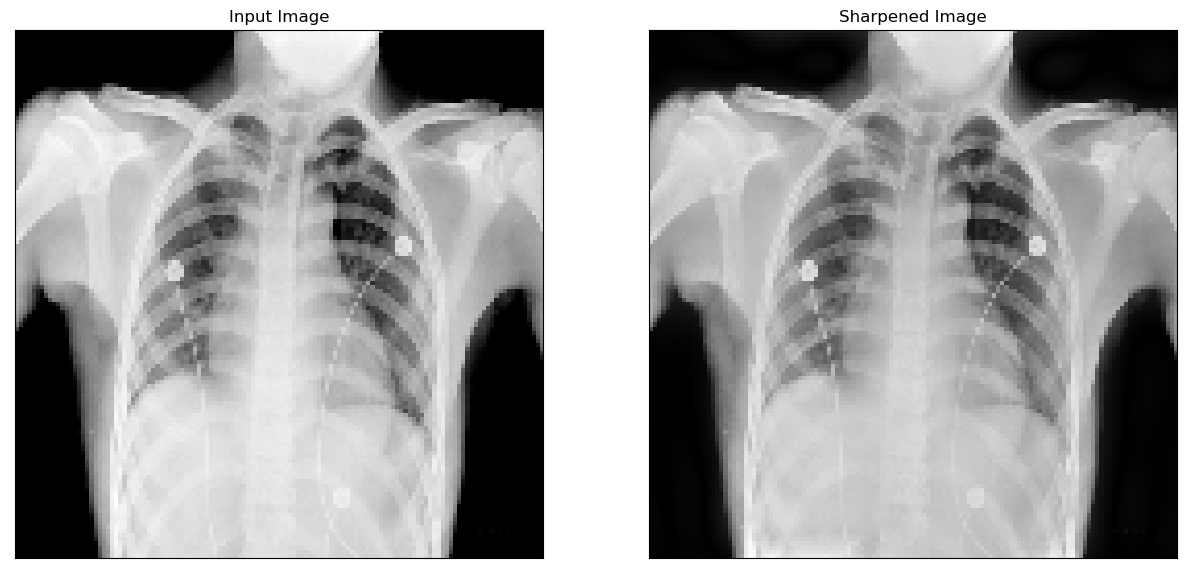

In [9]:
# sharpen the details

plt.subplot(121), plt.imshow(I, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_hp, cmap='gray')
plt.title("Sharpened Image"), plt.xticks([]), plt.yticks([])
plt.imshow(I + img_hp * 0.3, cmap='gray')
plt.show()

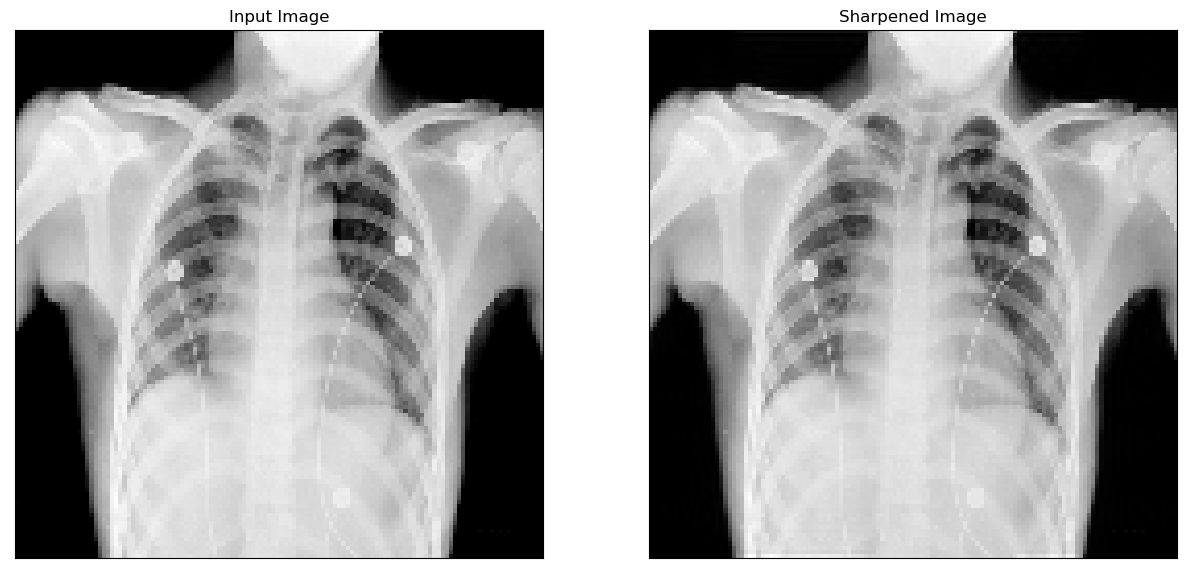

In [10]:
img_lp = low_pass_filter(I, x_lim=4, y_lim=4)
img_bp1 = bound_pass_filter(img=I, x_center=4, y_center=4, x_width=3, y_width=3)
img_bp2 = bound_pass_filter(img=I, x_center=10, y_center=10, x_width=3, y_width=3)
img_bp3 = bound_pass_filter(img=I, x_center=16, y_center=16, x_width=3, y_width=3)
img_bp4 = bound_pass_filter(img=I, x_center=4, y_center=4, x_width=3, y_width=3)
img_hp = high_pass_filter(I, x_lim=25, y_lim=25)

plt.subplot(121), plt.imshow(I, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(I + img_bp1*0.4+ img_bp2*0.9+img_bp3*0.8+img_bp4*0.50+img_hp*0.100+img_lp*0.5, cmap='gray')
plt.title("Sharpened Image"), plt.xticks([]), plt.yticks([])
plt.imshow(I + img_hp * 0.3, cmap='gray')
plt.show()
